<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Info" data-toc-modified-id="Info-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Info</a></span><ul class="toc-item"><li><span><a href="#Stacked-Area-plot" data-toc-modified-id="Stacked-Area-plot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Stacked Area plot</a></span></li><li><span><a href="#Line-plot-over-time" data-toc-modified-id="Line-plot-over-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Line plot over time</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Seasonality</a></span></li></ul></li></ul></div>

# Info

A auto eda script for time series. 

**WARNING**: You will need the full.csv file generated from bruno/'1.0-First look.ipynb' in the same directory

In [1]:
%%javascript
$('#menubar').toggle();

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

# For pretty printing pd tables
from IPython.display import display, HTML

from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Read definitions
if __name__ == "__main__" and '__file__' not in globals():
    with open("file.txt", "r") as f:
        DATA_PATH = f.readline().split("=")[1].strip()
        SEP = f.readline().split("=")[1].strip()
        TARGET_COL = f.readline().split("=")[1].strip()
        train_name = f.readline().split("=")[1].strip()
        test_name = f.readline().split("=")[1].strip()
        time_col = f.readline().split("=")[1].strip()
        try:
            skip_cols = f.readline().split("=")[1].strip()
        except:
            skip_cols = ""
        try:
            cat_cols = f.readline().split("=")[1].strip().split(", ")
        except:
            cat_cols = ""
            
    SPACE = "\n\n" + "---"*40 + "\n\n"

    # Any number less than this of nunique() will be considered as a categorical value
    #     encoded as numerical
    AMOUNT_TO_CONSIDER_CATEGORICAL = 50
    

In [3]:
if __name__ == "__main__" and '__file__' not in globals():
    train_df = pd.read_csv(f"{DATA_PATH}/{train_name}", sep=SEP)
    train_df[time_col] = pd.to_datetime(train_df[time_col])
    train_df["week_datetime"] = pd.to_datetime(train_df["week_datetime"])
    
    #test_df = pd.read_csv(f"{DATA_PATH}/{test_name}", sep=SEP)
    #test_df[time_col] = pd.to_datetime(test_df[time_col])

In [4]:
def seasonality_plots(df):
    # We don't use "weekly" since we've already agregated
    time_groups = ["Monthly"]  # "Weekly", 
    orders = [#  ['Monday', 'Tuesday', 'Wednesday',  'Thursday', 'Friday', 
              #  'Saturday', 'Sunday'],
              ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
              ]] #'August', 'September', 'October', 'November', 'December']]

    for time_group, order in zip(time_groups, orders):
        print(f"{time_group} # by category")
        for cat_col in cat_cols:
            for name, group in df.groupby(cat_col):
                if time_group == "Weekly":
                    temp = df.groupby(group["week_datetime"].dt.day_name())
                else: 
                    temp = df.groupby(group["week_datetime"].dt.month_name())

                temp = temp[TARGET_COL].sum().reset_index()
                sns.barplot(data=temp, y=TARGET_COL, x="week_datetime", 
                            order=order)
                plt.xticks(rotation=90)
                plt.ylabel(name)
                plt.title(f"{cat_col} considering only {name}")
                plt.show() 
                break
        print(SPACE)
            
def line_plot_over_time(df, amount_cols=2, stop=None):
    print("Average")
    sns.lineplot(data=df.groupby("week_datetime")[TARGET_COL].sum())
    plt.title("Amount os sales")
    plt.show()
    print(SPACE)
    
    # Now per category, in order of the most frequent
    for col in cat_cols:
        cols = df.groupby(col)[TARGET_COL].sum()
        cols = cols.sort_values(ascending=False).index
        
        data = pd.DataFrame()
        for name, group in train_df.groupby(col):
            data[name] = group.groupby("week_datetime")[TARGET_COL].sum()
        data_perc = data.fillna(0)

        for col_idx in range(0, len(cols)//amount_cols):
            if stop is not None and col_idx >= stop:
                print(f"Breaking because {stop} cols has been reached")
                break
            plt.figure(figsize=(32, 18))
            use_cols = cols[col_idx*amount_cols: col_idx*amount_cols + amount_cols]
            use_data = [data_perc[x] for x in use_cols]
            for col in use_cols:
                sns.lineplot(data=data_perc[col], label=col)
            plt.legend(loc='upper left')
            plt.title(f"Top {amount_cols} of column {col};" + 
                      f"{col_idx*amount_cols} - {col_idx*amount_cols + amount_cols}")
            plt.show()

def stacked_area_plot(df, amount_cols=10, stop=None):
    for col in cat_cols:
        cols = df.groupby(col)[TARGET_COL].sum()
        cols = cols.sort_values(ascending=False).index

        # We must calculate on all the data to not skew the plot %
        data = pd.DataFrame()
        for name, group in train_df.groupby(col):
            data[name] = group.groupby("week_datetime")[TARGET_COL].sum()
        data_perc = data.divide(data.sum(axis=1), axis=0)
        data_perc.fillna(0, inplace=True)

        for col_idx in range(0, len(cols)//amount_cols):
            if stop is not None and col_idx >= stop:
                print(f"Breaking because {stop} cols has been reached")
                break
            plt.figure(figsize=(32, 18))
            use_cols = cols[col_idx*amount_cols: col_idx*amount_cols + amount_cols]
            use_data = [data_perc[x] for x in use_cols]
            plt.stackplot(data_perc.index,  *use_data, labels=use_cols)
            plt.legend(loc='upper left')
            plt.title(f"Top {amount_cols} of column {col};" + 
                      f" offset {col_idx*amount_cols} - {col_idx*amount_cols + amount_cols}")
            plt.margins(0,0)
            plt.show()




- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Stacked Area plot

/home/bcoelho/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


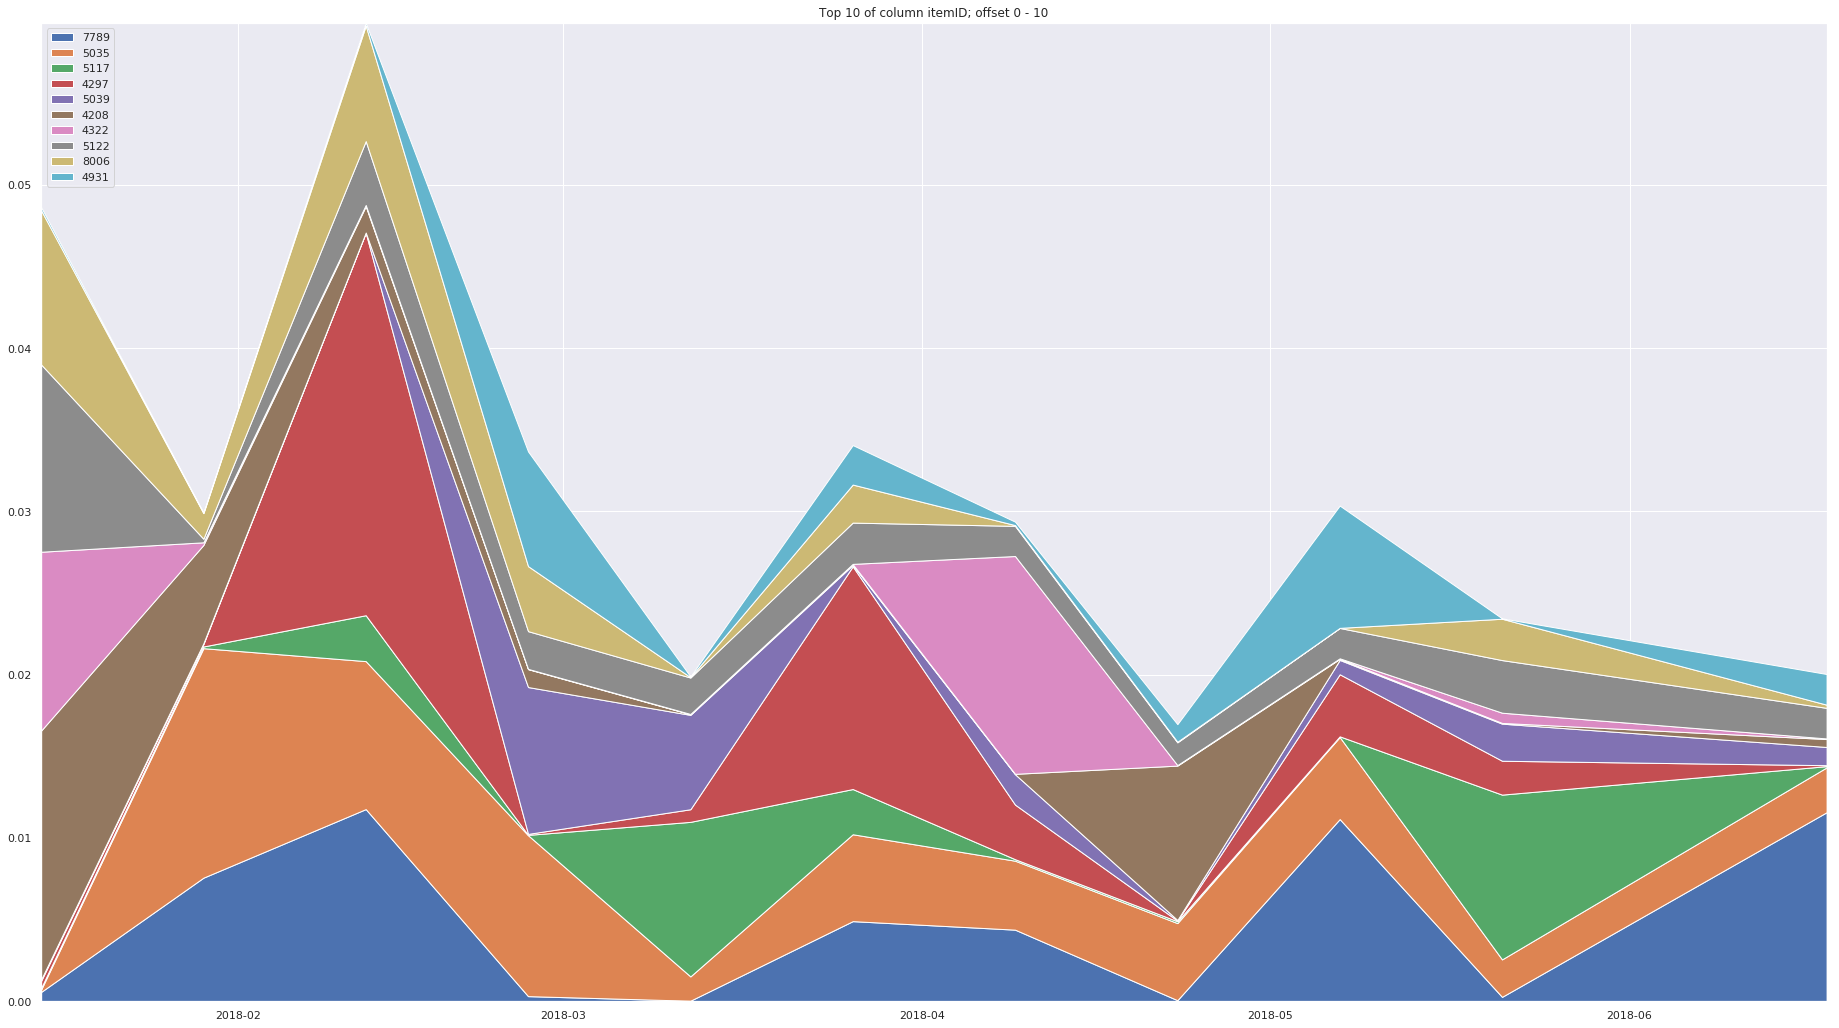

Breaking because 1 cols has been reached


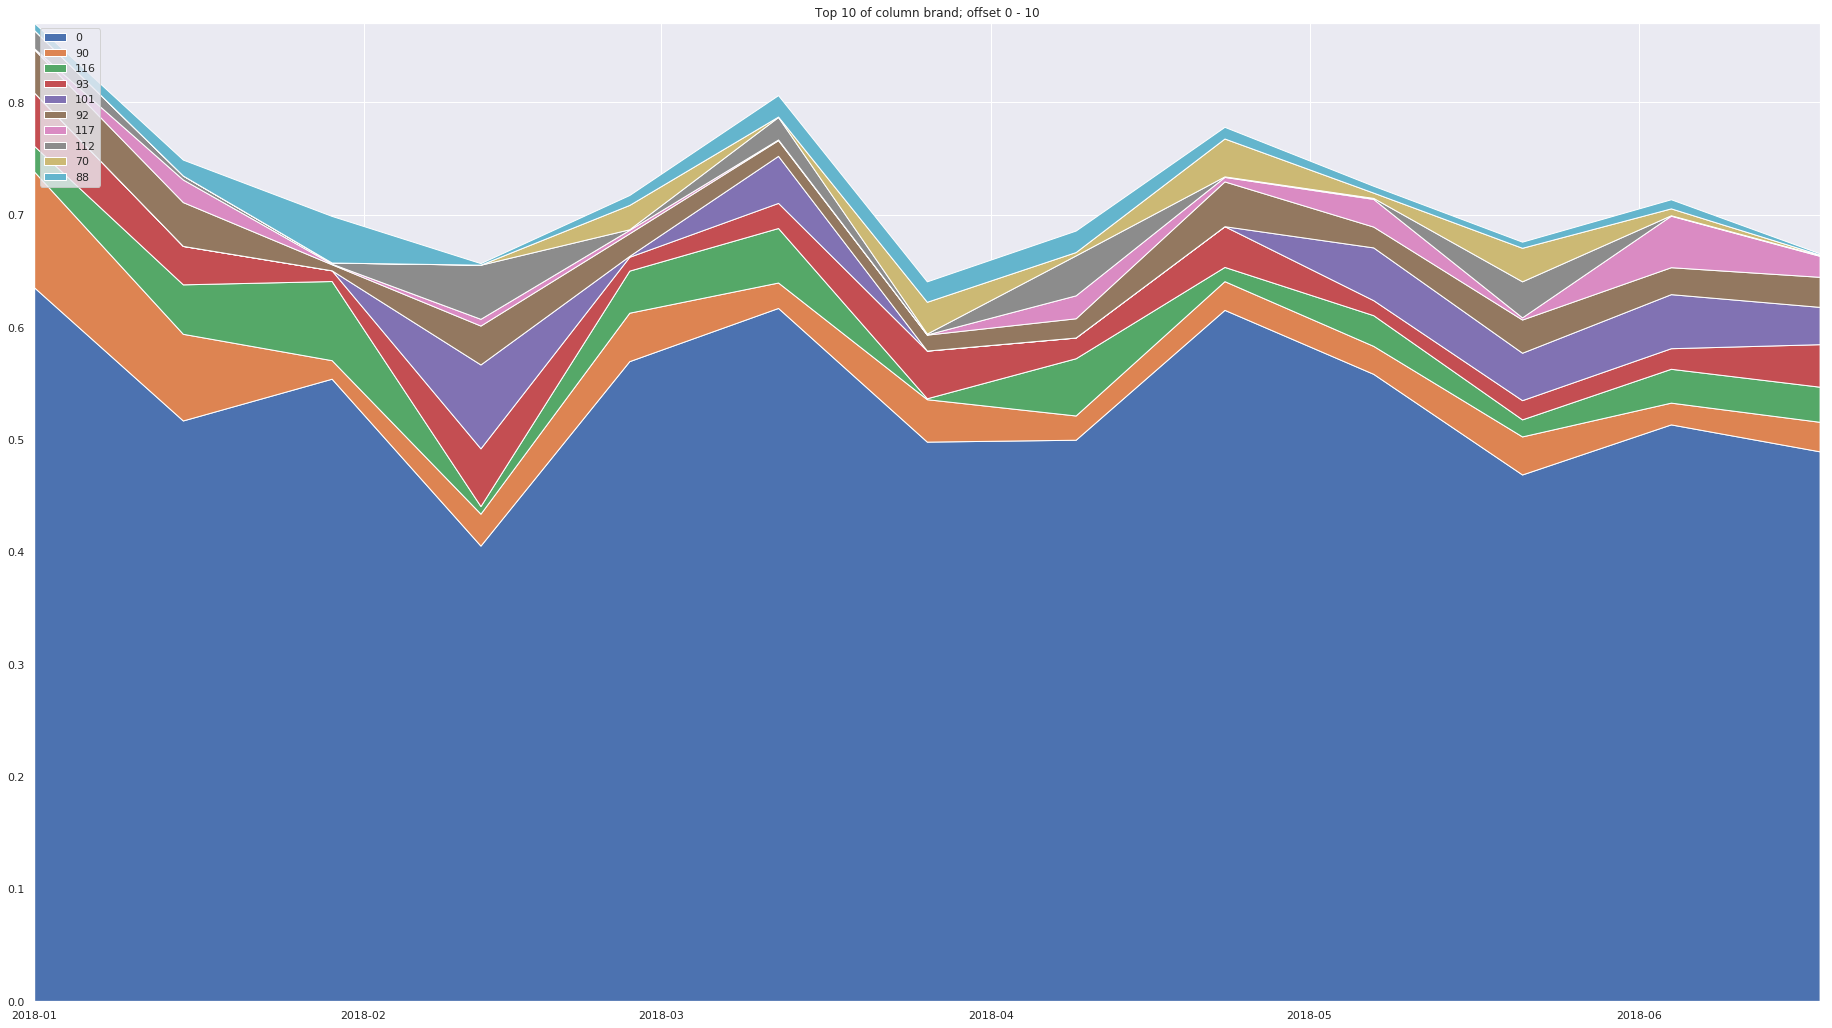

Breaking because 1 cols has been reached


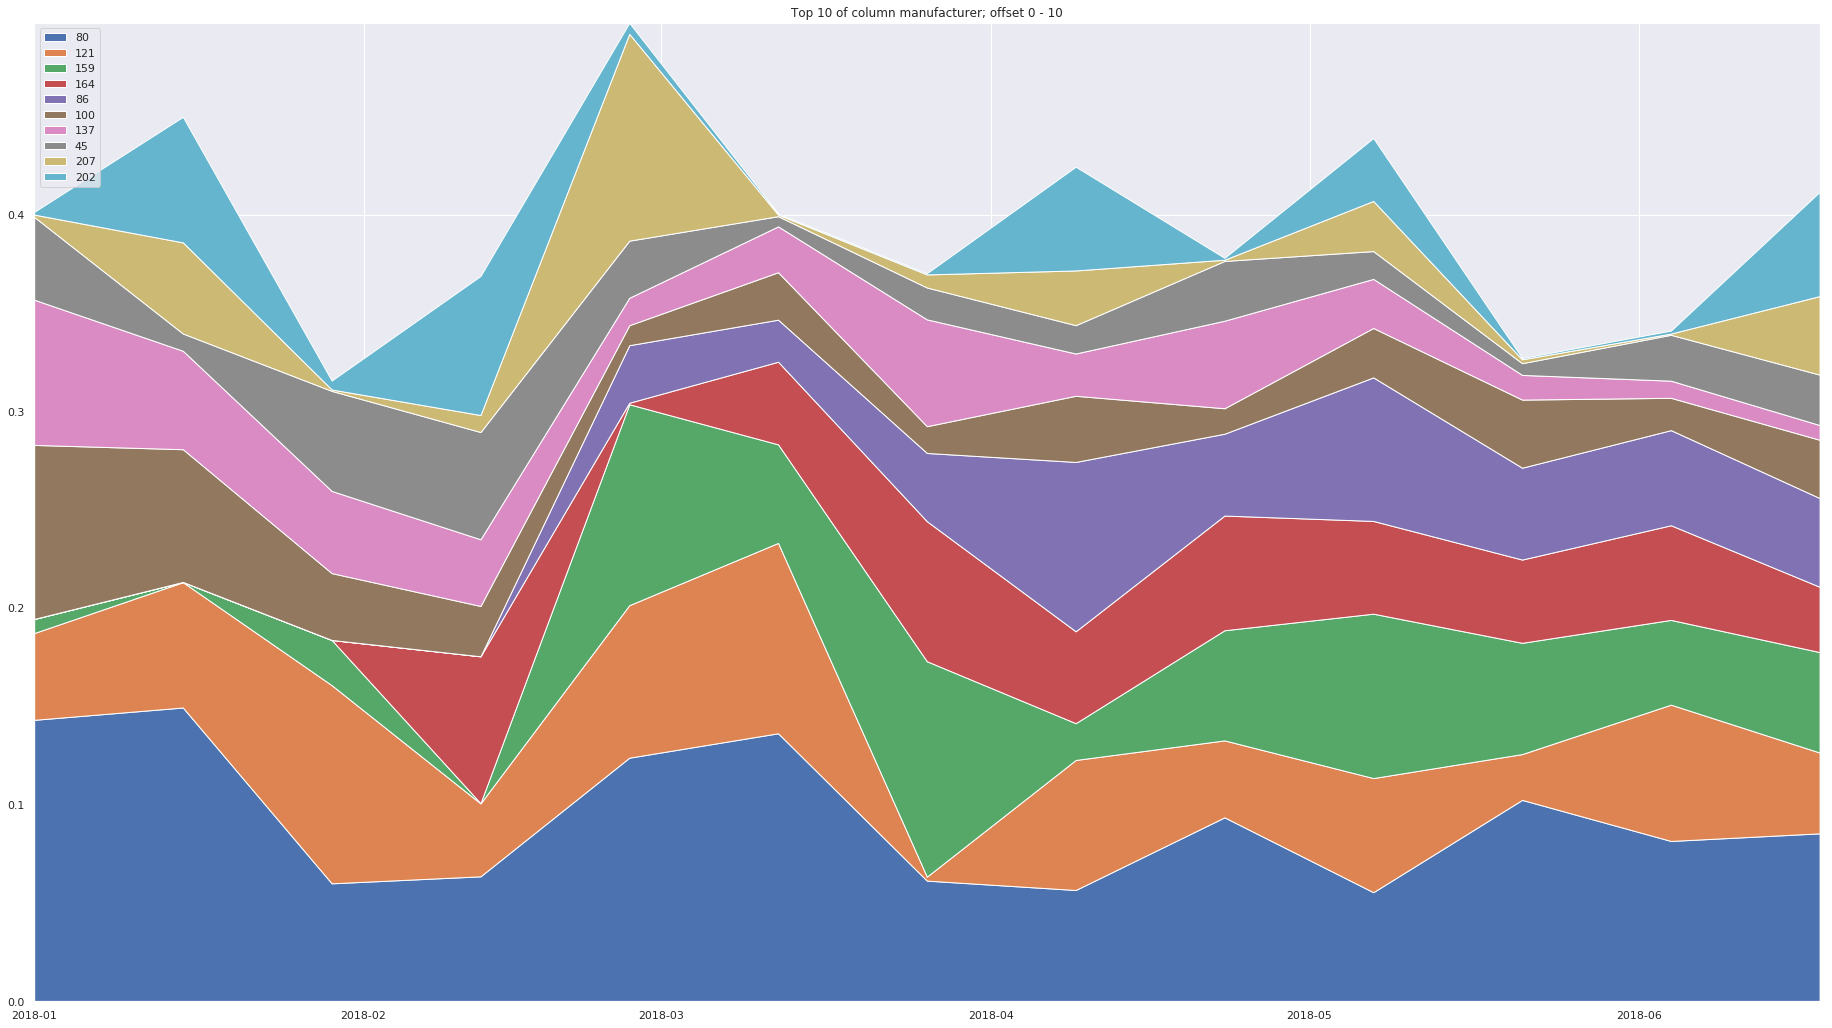

Breaking because 1 cols has been reached


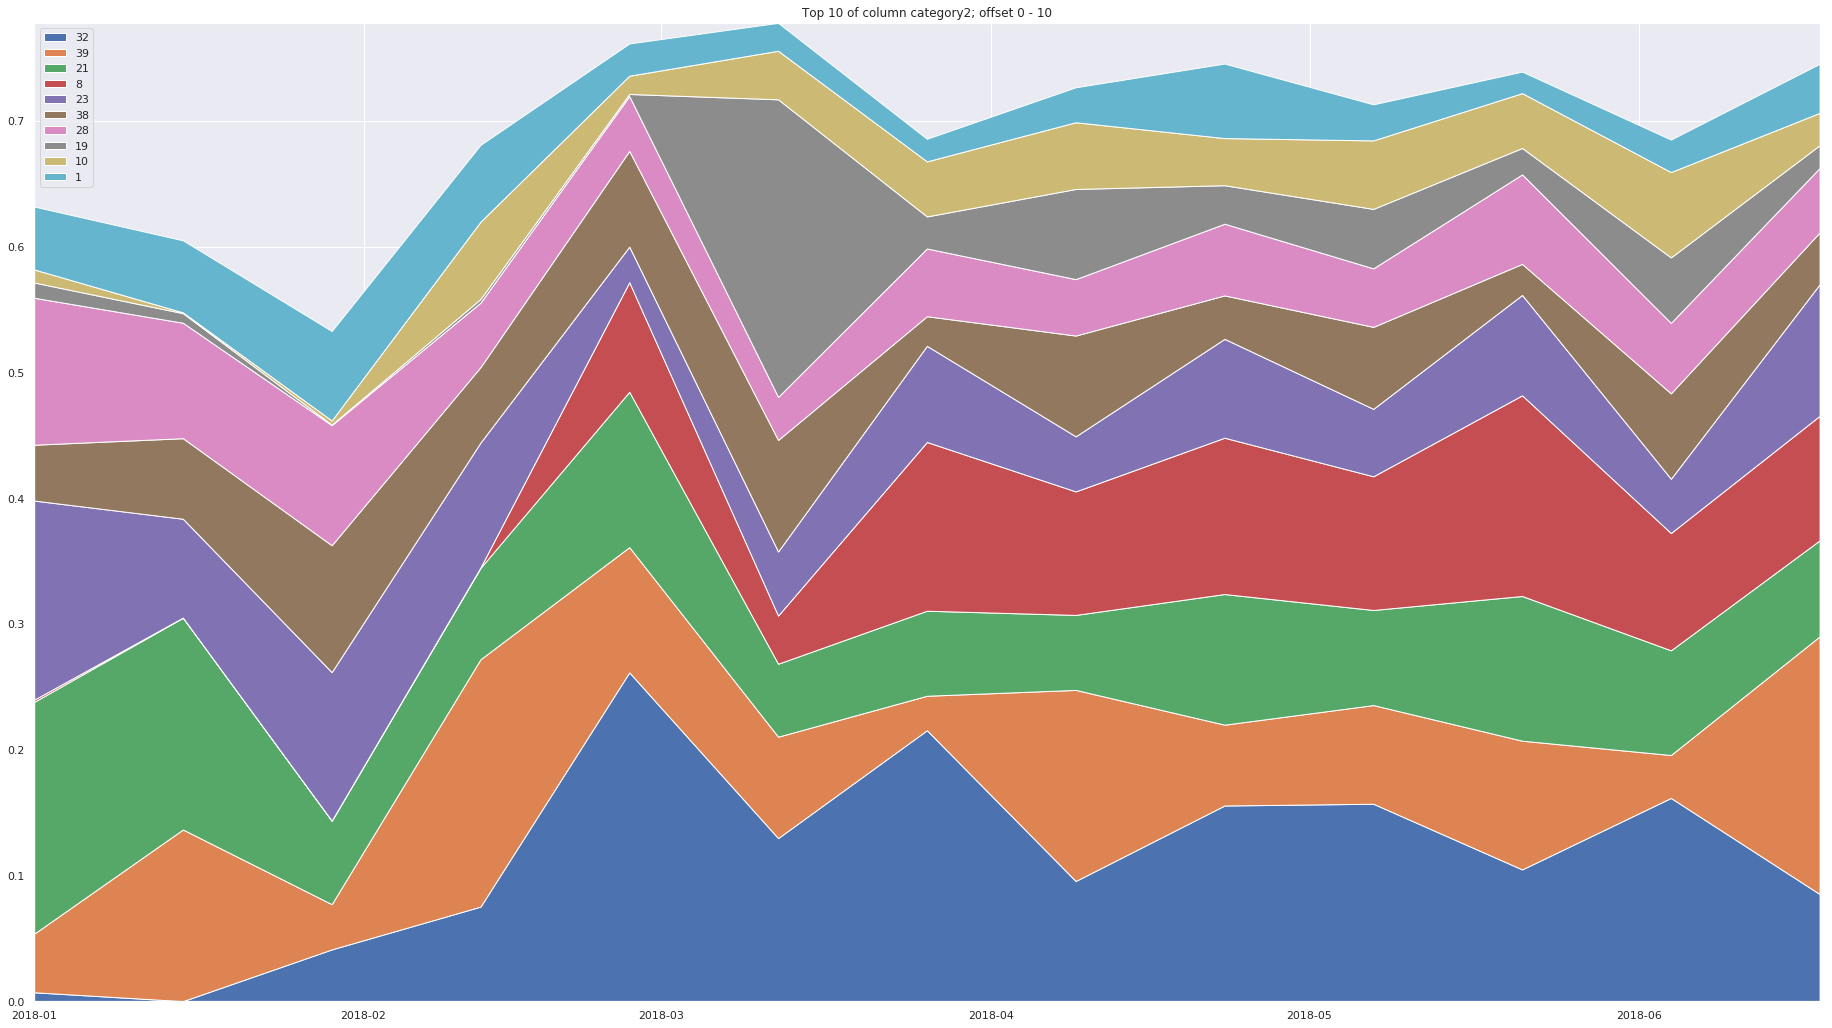

Breaking because 1 cols has been reached


In [5]:
if __name__ == "__main__" and '__file__' not in globals():
    stacked_area_plot(train_df, amount_cols=10, stop=1)



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Line plot over time

Average


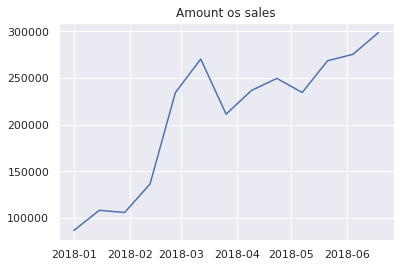



------------------------------------------------------------------------------------------------------------------------




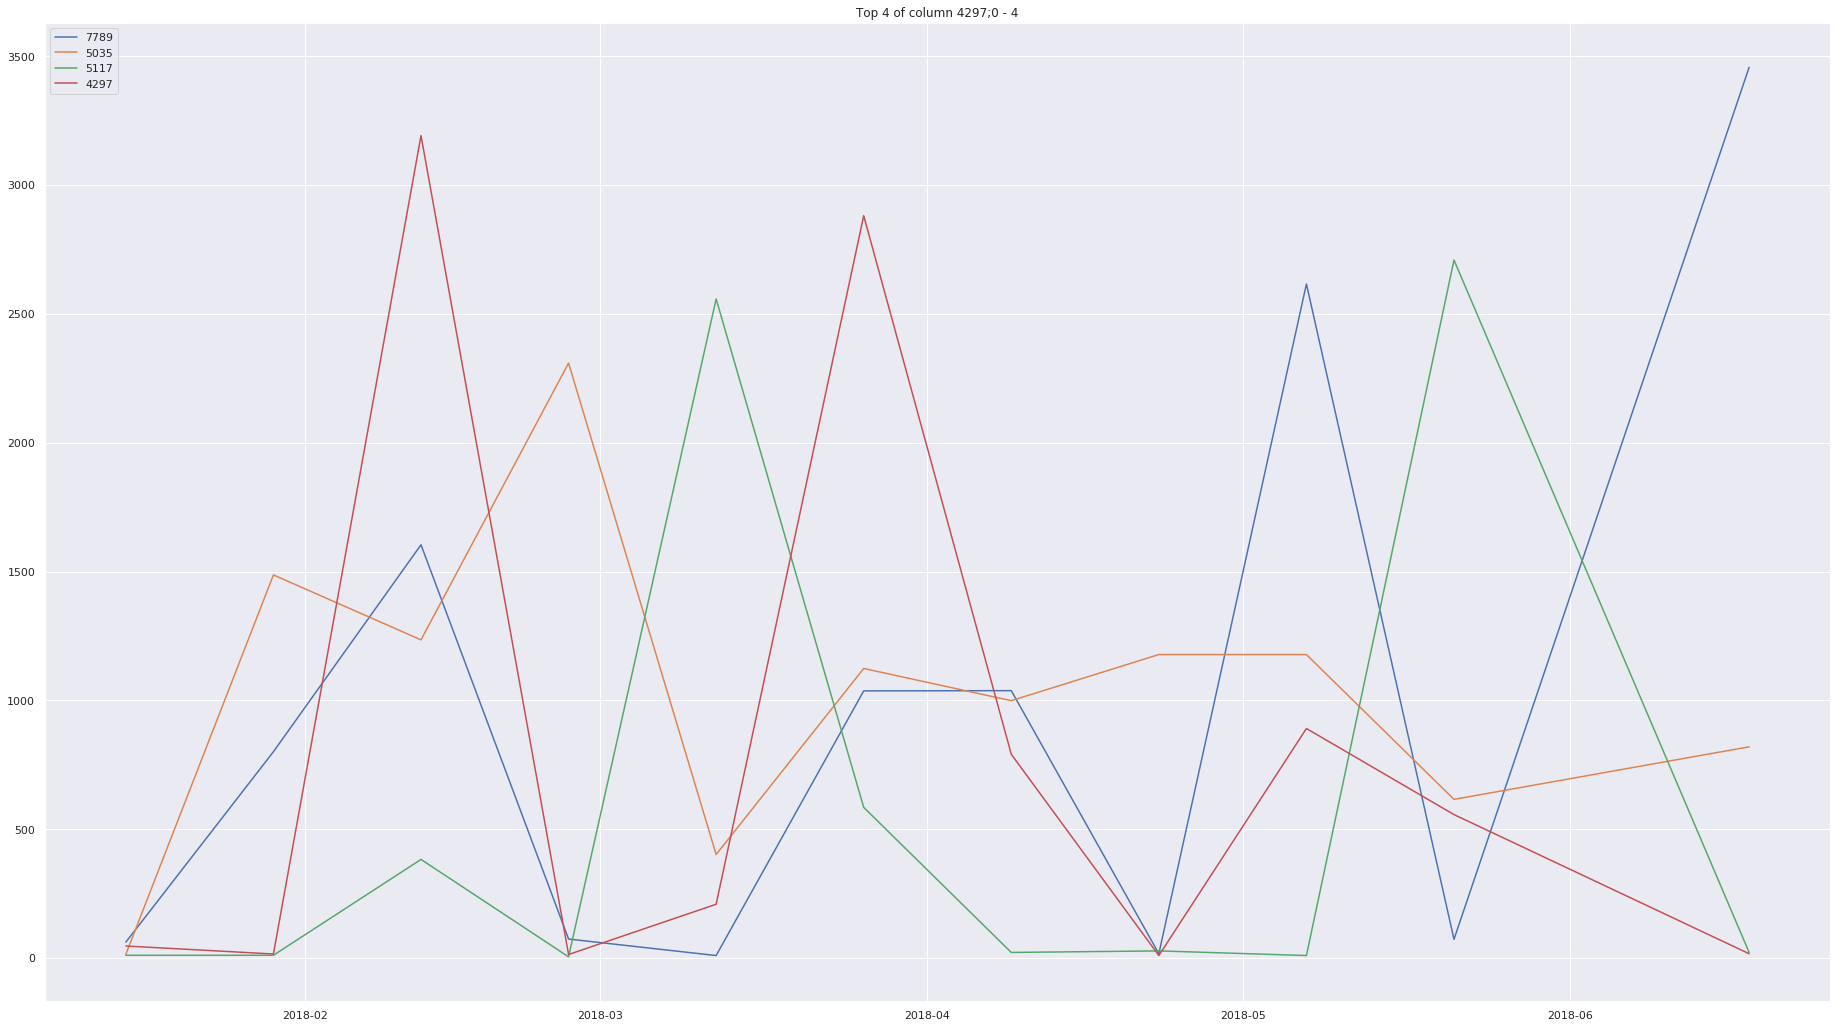

Breaking because 1 cols has been reached


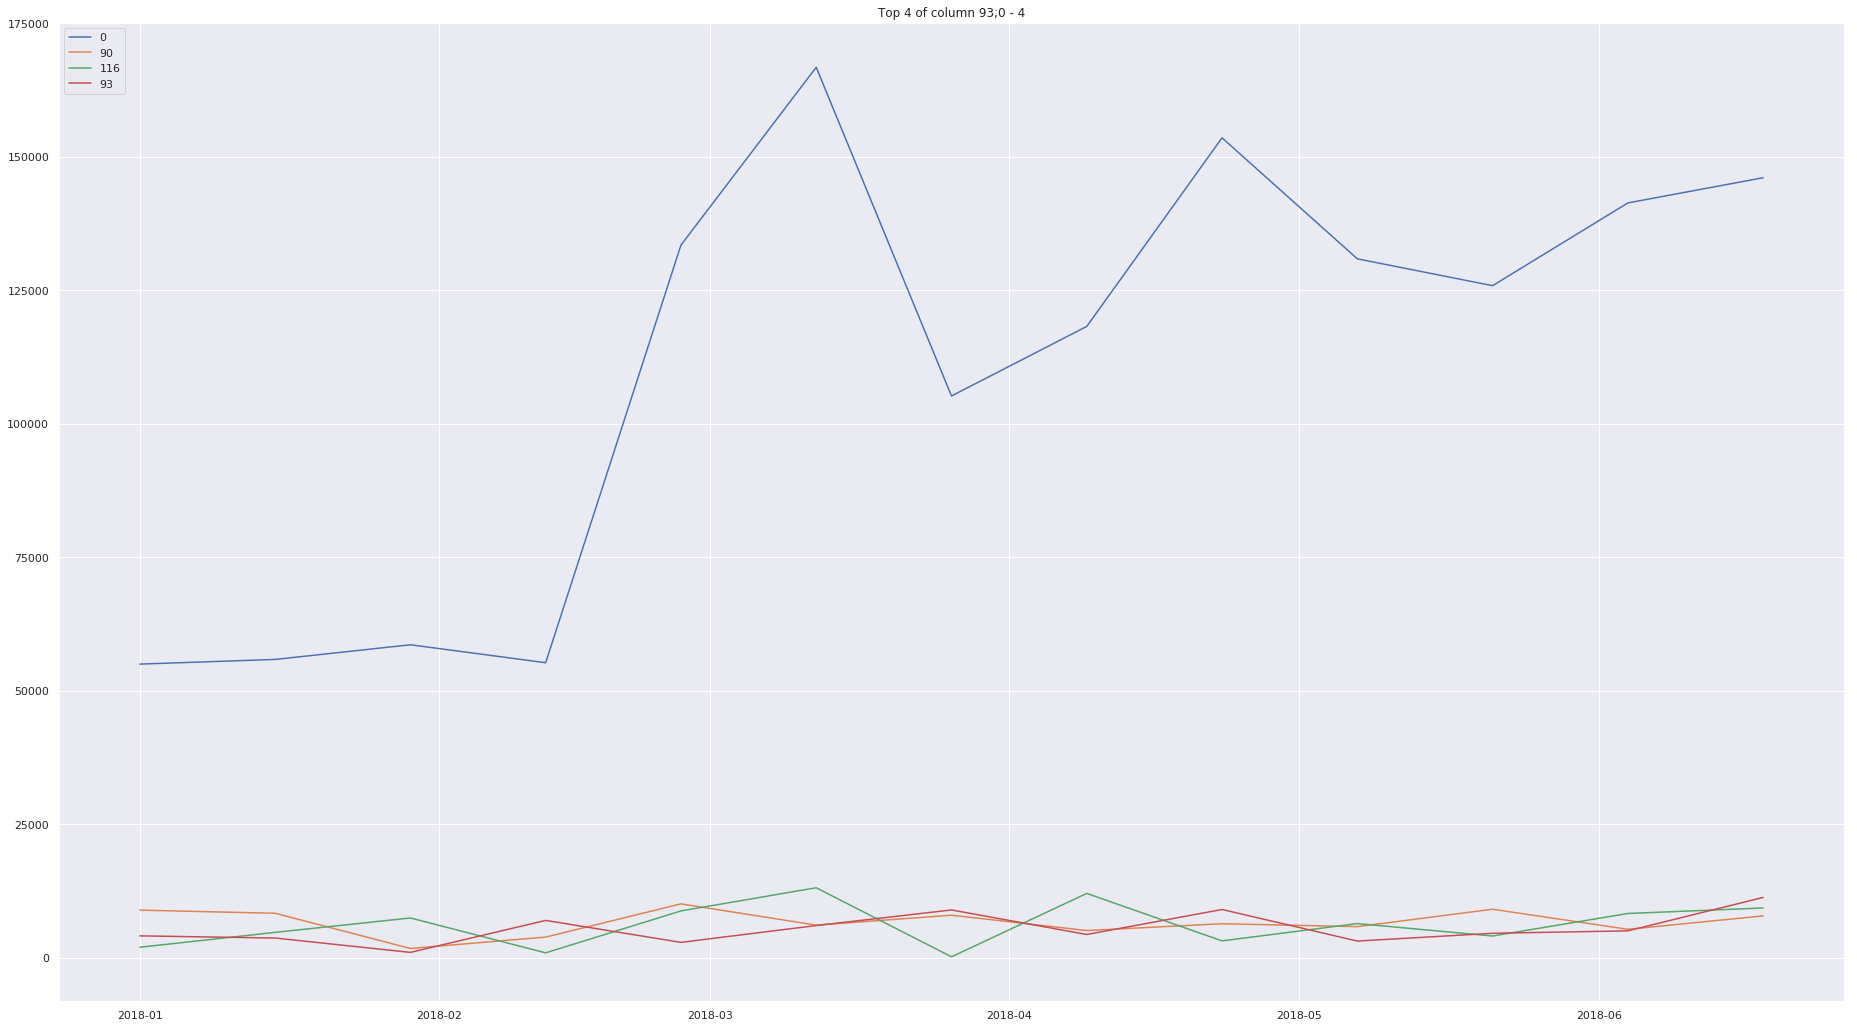

Breaking because 1 cols has been reached


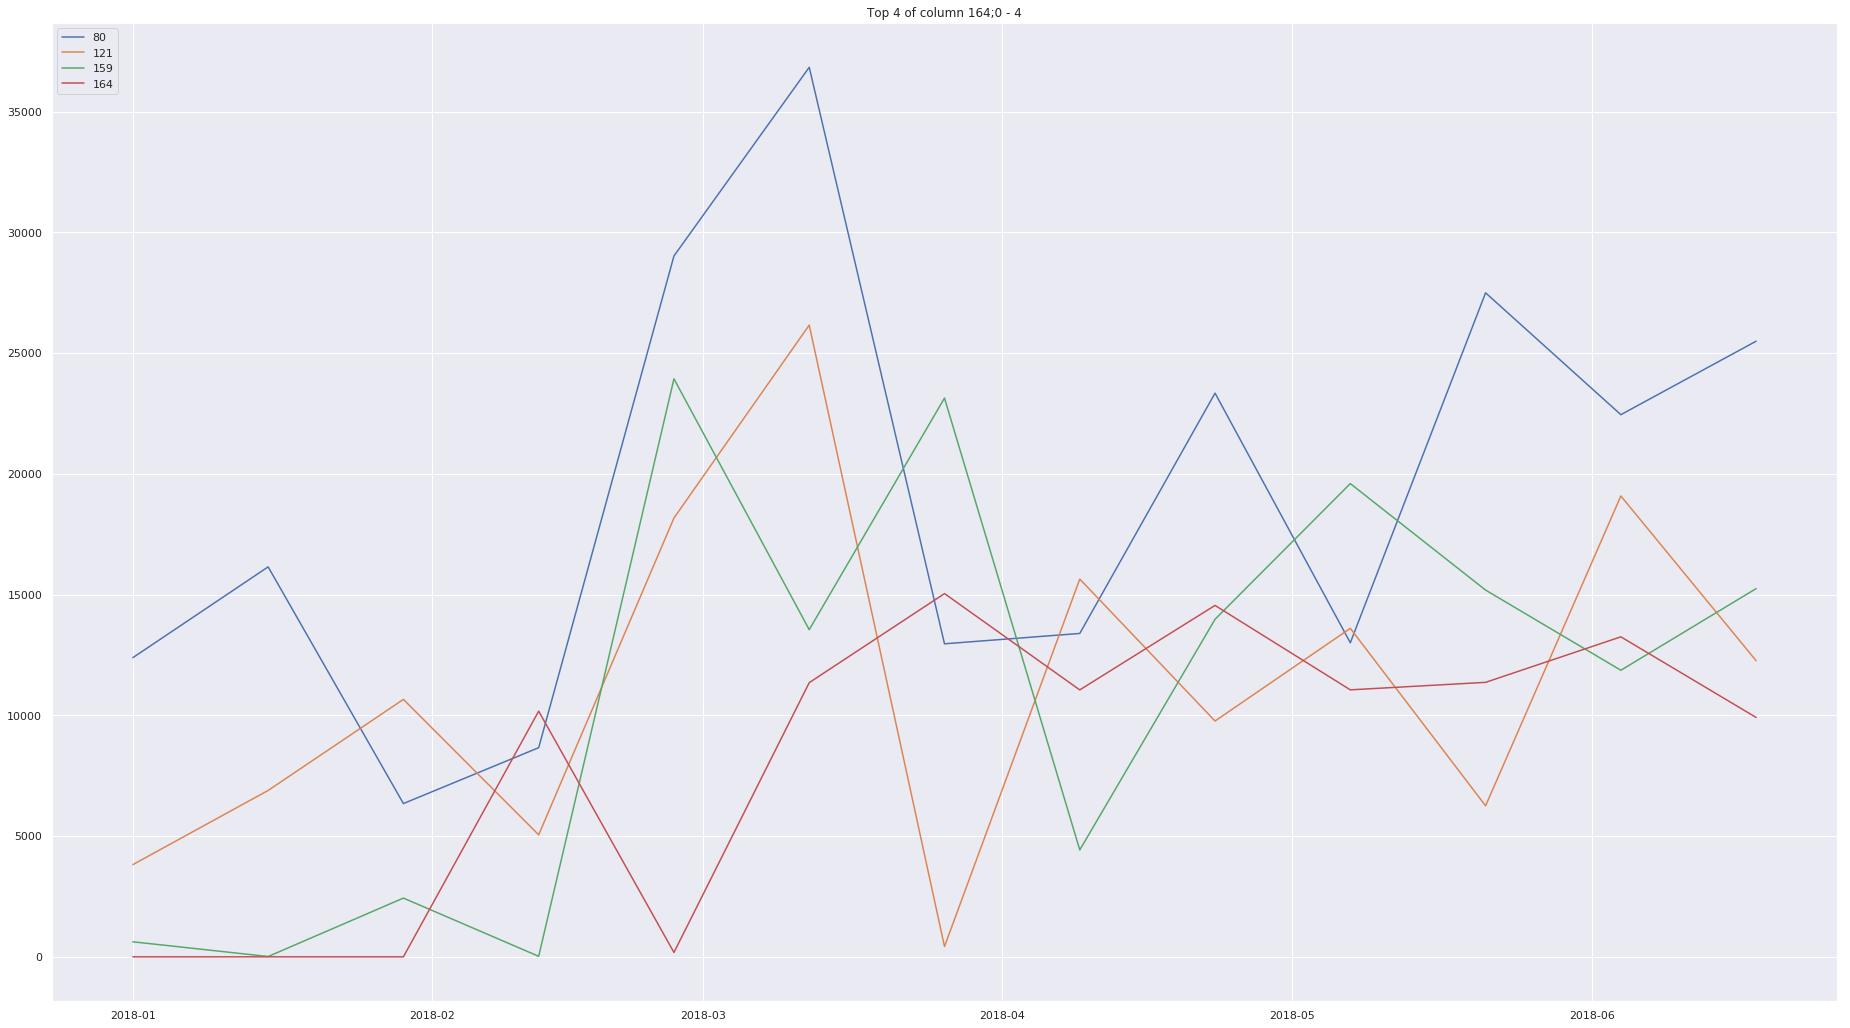

Breaking because 1 cols has been reached


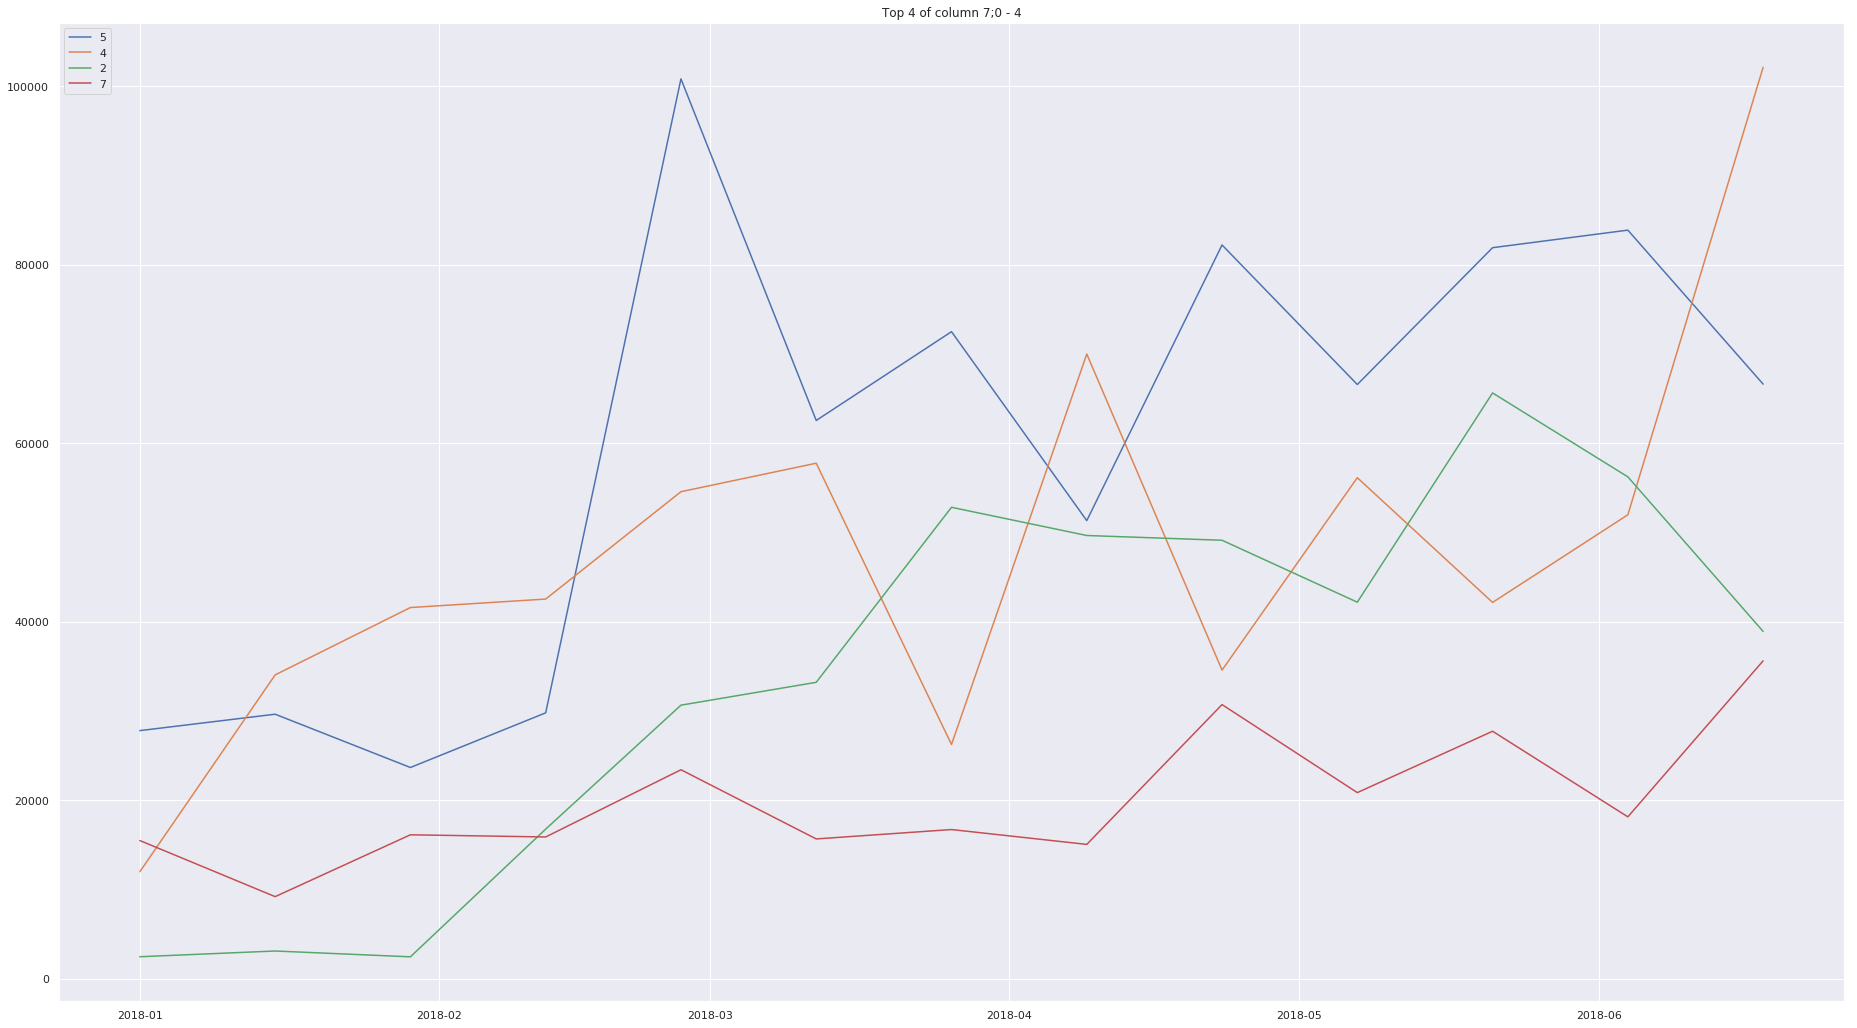

Breaking because 1 cols has been reached


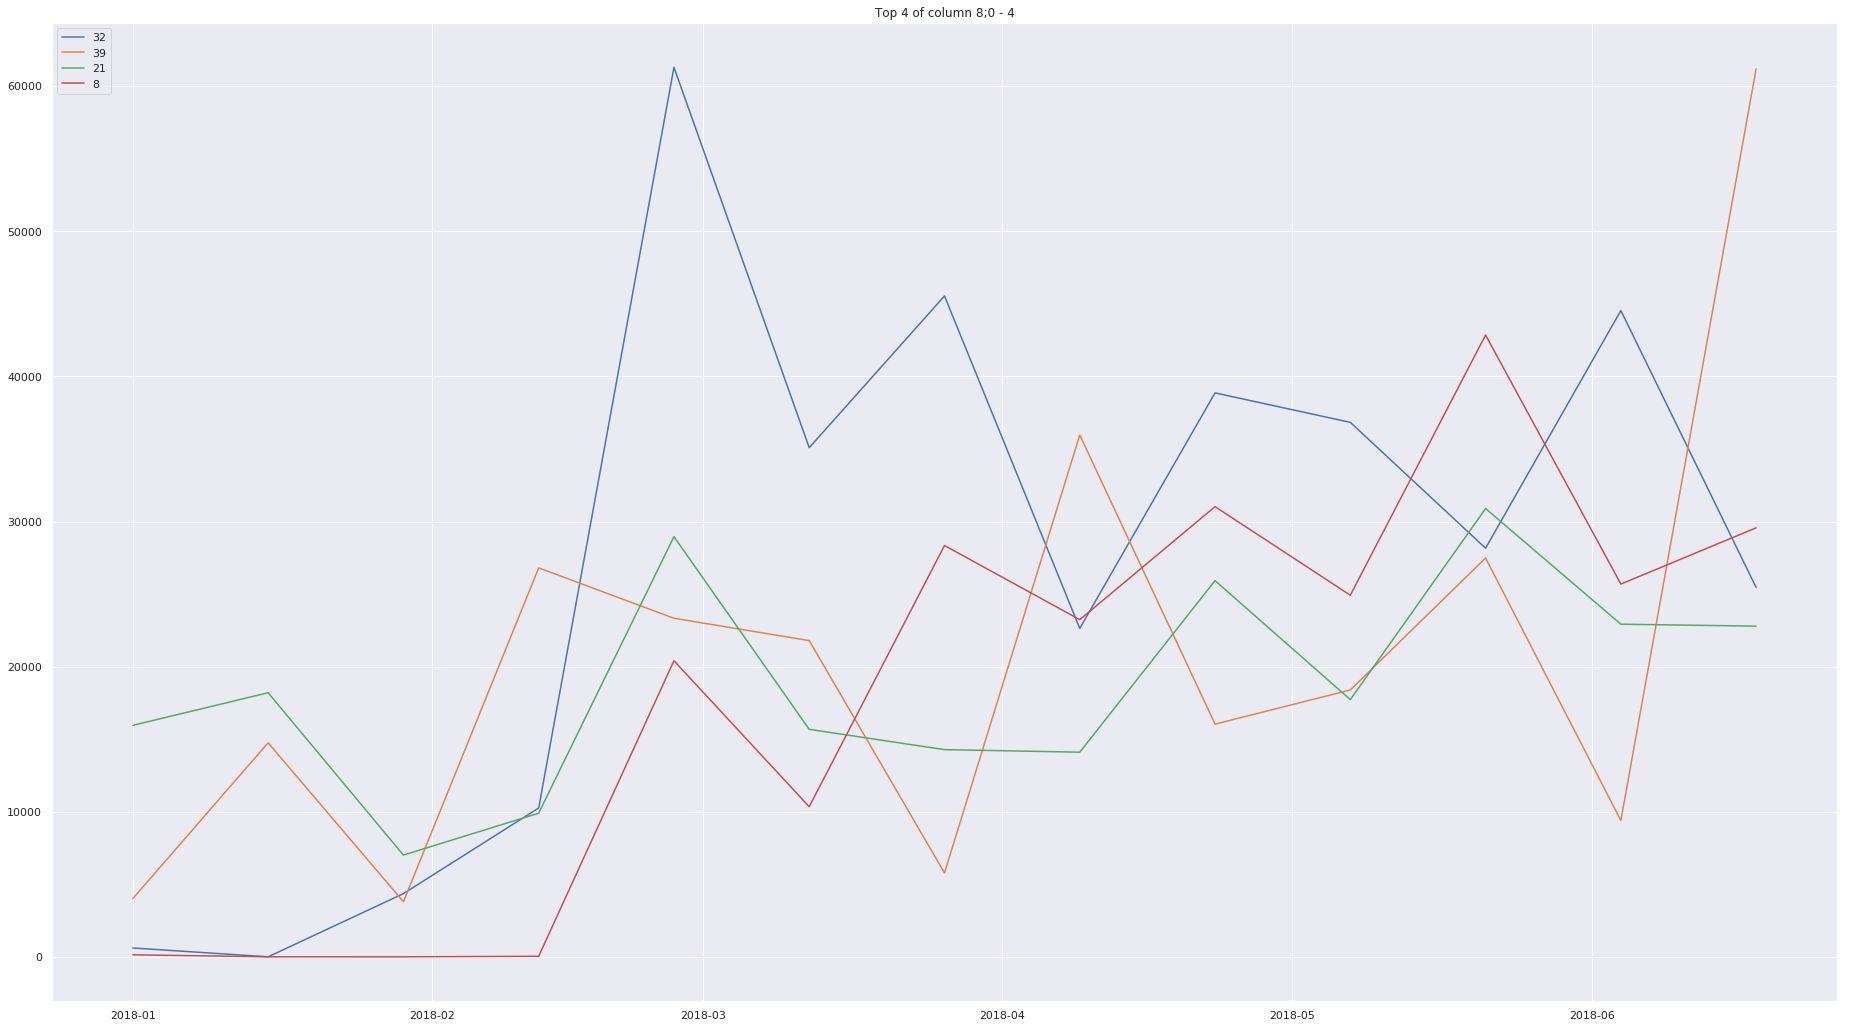

Breaking because 1 cols has been reached


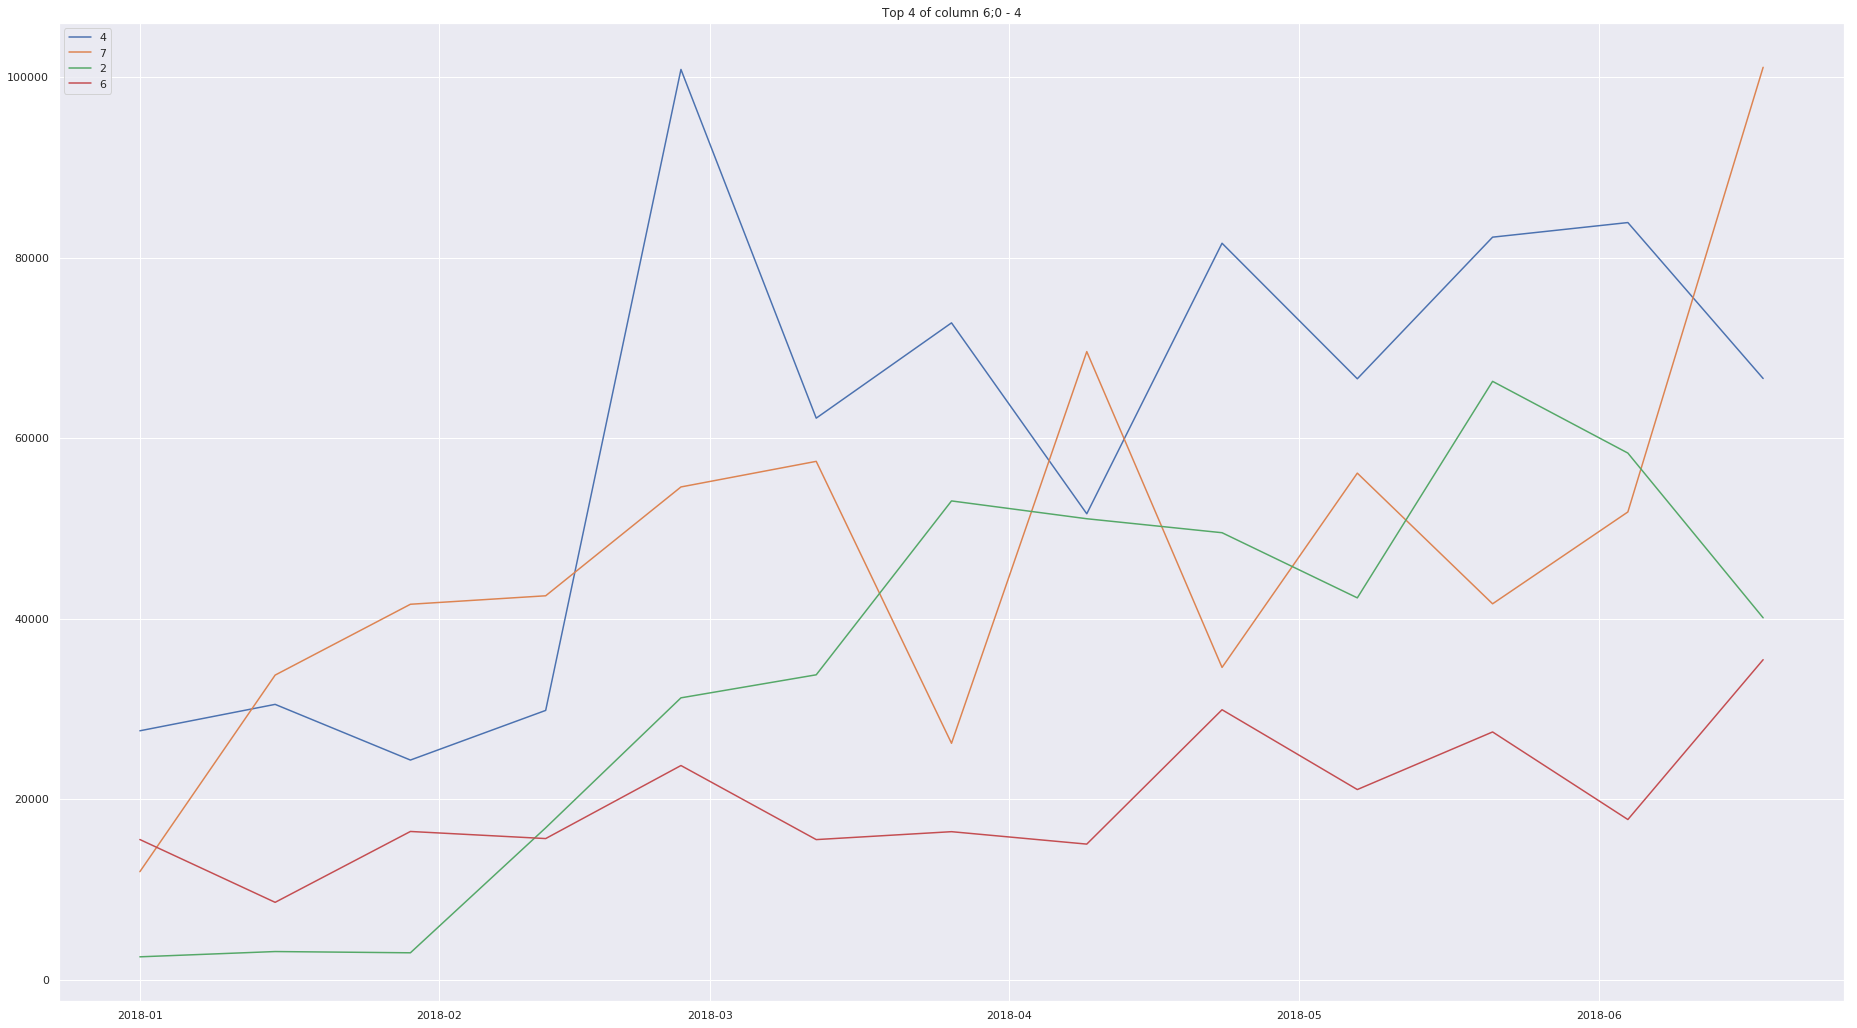

Breaking because 1 cols has been reached


In [6]:
if __name__ == "__main__" and '__file__' not in globals():
    line_plot_over_time(train_df, amount_cols=4, stop=1)



- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Seasonality

Monthly # by category


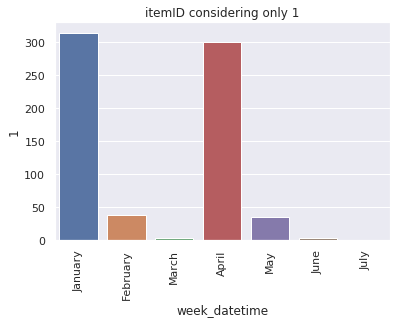

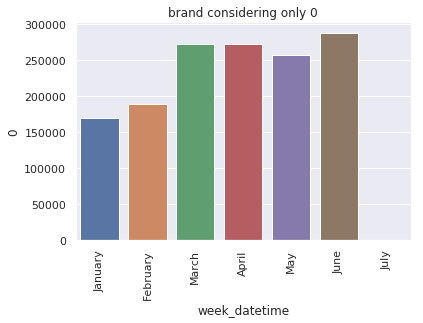

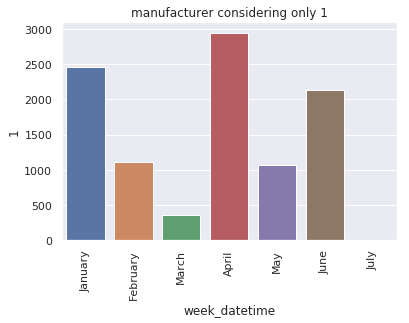

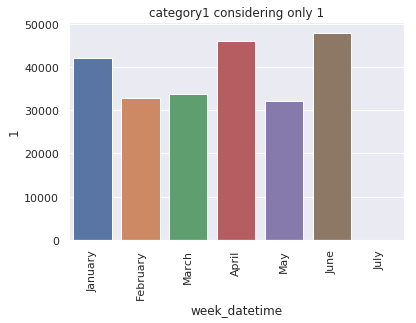

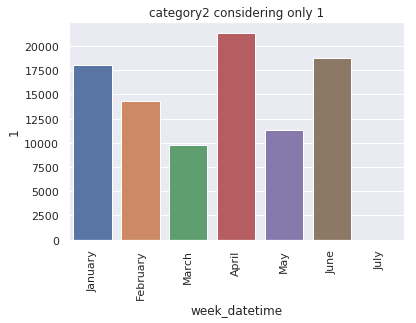

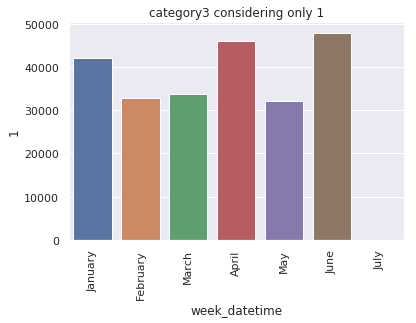

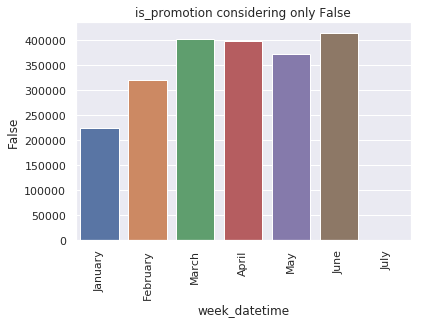



------------------------------------------------------------------------------------------------------------------------




In [7]:
if __name__ == "__main__" and '__file__' not in globals():
    seasonality_plots(train_df)